In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [2]:
TD = pd.read_csv("TD.csv")

In [3]:
TD

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/28/00,13.000000,13.250000,12.875000,13.187500,3.820463,196200
1,3/29/00,13.093750,13.343750,13.093750,13.312500,3.856675,153600
2,3/30/00,13.343750,13.750000,13.343750,13.562500,3.929102,282800
3,3/31/00,13.625000,13.656250,13.187500,13.343750,3.865730,164600
4,4/3/00,13.312500,13.687500,13.000000,13.000000,3.766143,190000
...,...,...,...,...,...,...,...
5024,3/18/20,38.380001,39.169998,35.689999,37.939999,37.939999,2890200
5025,3/19/20,37.040001,37.880001,35.590000,37.430000,37.430000,2419100
5026,3/20/20,38.720001,40.230000,36.060001,36.910000,36.910000,3073300
5027,3/23/20,36.080002,36.799999,33.740002,33.830002,33.830002,4336900


In [4]:
TD.index
TD.index[0]
TD.index[-1]
TD.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
TD.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5019,3/11/20,43.169998,43.299999,42.070000,42.119999,42.119999,4856900
5020,3/12/20,39.619999,39.639999,36.150002,37.410000,37.410000,3988500
5021,3/13/20,39.619999,43.439999,38.369999,43.419998,43.419998,4026300
5022,3/16/20,37.349998,41.299999,36.000000,39.250000,39.250000,2615200
5023,3/17/20,39.680000,41.939999,39.040001,40.560001,40.560001,2603500
5024,3/18/20,38.380001,39.169998,35.689999,37.939999,37.939999,2890200
5025,3/19/20,37.040001,37.880001,35.590000,37.430000,37.430000,2419100
5026,3/20/20,38.720001,40.230000,36.060001,36.910000,36.910000,3073300
5027,3/23/20,36.080002,36.799999,33.740002,33.830002,33.830002,4336900
5028,3/24/20,36.029999,38.869999,35.630001,38.660000,38.660000,4074400


In [6]:
TD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5.029000e+03
mean,33.562754,33.812130,33.293803,33.562112,22.865048,1.124211e+06
std,14.802339,14.847041,14.736898,14.792769,16.522863,1.247304e+06
min,7.890000,8.280000,7.885000,7.940000,2.641973,9.400000e+03
25%,19.610001,19.805000,19.415001,19.620001,7.810097,1.798000e+05
50%,35.014999,35.325001,34.665001,34.980000,19.038347,8.977000e+05
75%,44.169998,44.439999,43.939999,44.160000,34.813255,1.543700e+06
max,61.860001,62.000000,61.590000,61.820000,57.531891,2.552140e+07


In [7]:
TD.loc[5025+1,'Close']

36.91

In [8]:
TD.iloc[10,3]

12.0625

In [9]:
TD.loc[505:605,'Close']

505    13.760
506    13.770
507    13.715
508    13.965
509    13.850
        ...  
601    11.205
602    11.095
603    10.920
604    11.070
605    11.090
Name: Close, Length: 101, dtype: float64

In [10]:
TD.iloc[624:,:]

,Date,Open,High,Low,Close,Adj Close,Volume
624,9/24/02,8.650000,9.000000,8.615000,8.730000,2.904838,127600
625,9/25/02,9.000000,9.000000,8.795000,8.810000,2.931458,132200
626,9/26/02,8.900000,9.025000,8.840000,8.985000,2.989688,203800
627,9/27/02,9.000000,9.005000,8.725000,8.725000,2.903176,106200
628,9/30/02,8.720000,8.995000,8.600000,8.805000,2.929794,201400
...,...,...,...,...,...,...,...
5024,3/18/20,38.380001,39.169998,35.689999,37.939999,37.939999,2890200
5025,3/19/20,37.040001,37.880001,35.590000,37.430000,37.430000,2419100
5026,3/20/20,38.720001,40.230000,36.060001,36.910000,36.910000,3073300
5027,3/23/20,36.080002,36.799999,33.740002,33.830002,33.830002,4336900


<AxesSubplot:>

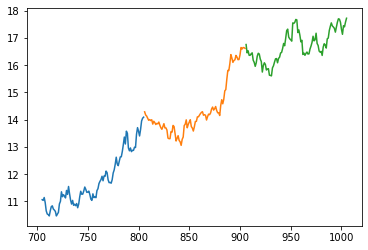

In [11]:
TD.loc[705:805,'Close'].plot()
TD.loc[806:905,'Close'].plot()
TD.loc[906:1005,'Close'].plot()

In [12]:
TD[["Open","Close"]]

,Open,Close
0,13.000000,13.187500
1,13.093750,13.312500
2,13.343750,13.562500
3,13.625000,13.343750
4,13.312500,13.000000
...,...,...
5024,38.380001,37.939999
5025,37.040001,37.430000
5026,38.720001,36.910000
5027,36.080002,33.830002


In [13]:
TD['price1'] = TD['Close'].shift(-1)

In [14]:
TD['price1']


0       13.312500
1       13.562500
2       13.343750
3       13.000000
4       12.406250
          ...    
5024    37.430000
5025    36.910000
5026    33.830002
5027    38.660000
5028          NaN
Name: price1, Length: 5029, dtype: float64

In [15]:
TD['PriceDiff'] = TD['Close'].shift(-1)-TD['Close']

In [16]:
TD.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price1,PriceDiff
0,3/28/00,13.00000,13.25000,12.87500,13.18750,3.820463,196200,13.31250,0.12500
1,3/29/00,13.09375,13.34375,13.09375,13.31250,3.856675,153600,13.56250,0.25000
2,3/30/00,13.34375,13.75000,13.34375,13.56250,3.929102,282800,13.34375,-0.21875
3,3/31/00,13.62500,13.65625,13.18750,13.34375,3.865730,164600,13.00000,-0.34375
4,4/3/00,13.31250,13.68750,13.00000,13.00000,3.766143,190000,12.40625,-0.59375


In [17]:
TD['return']=TD["PriceDiff"]/TD['Open']

<AxesSubplot:>

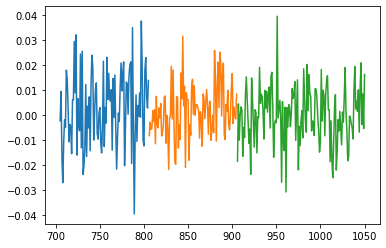

In [18]:
TD.loc[705:805,'return'].plot()
TD.loc[806:905,'return'].plot()
TD.loc[906:1050,'return'].plot()

In [19]:
TD["Direction"] = [1 if TD.loc[ei,'PriceDiff']>0 else -1 for ei in TD.index]

In [20]:
TD["MA(3)"] = (TD['Close']+TD['Close'].shift(1)+TD["Close"].shift(2))/3

In [21]:
TD["MA(3)"]

0             NaN
1             NaN
2       13.354167
3       13.406250
4       13.302083
          ...    
5024    39.250000
5025    38.643333
5026    37.426666
5027    36.056667
5028    36.466667
Name: MA(3), Length: 5029, dtype: float64

<AxesSubplot:>

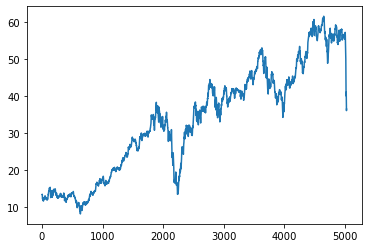

In [22]:
TD["MA(3)"].plot()

In [23]:
TD["Direction"]

0       1
1       1
2      -1
3      -1
4      -1
       ..
5024   -1
5025   -1
5026   -1
5027    1
5028   -1
Name: Direction, Length: 5029, dtype: int64

In [24]:
TD['MA(40)']=TD["Close"].rolling(40).mean()
TD["MA(200)"]=TD["Close"].rolling(200).mean()

<AxesSubplot:>

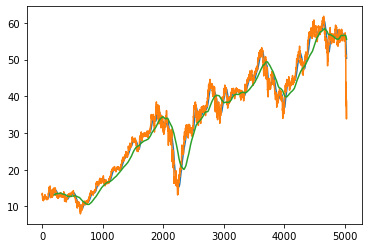

In [25]:
TD['MA(40)'].plot()
TD["Close"].plot()
TD["MA(200)"].plot()

In [26]:
TD['Shares'] = [1 if TD.loc[ei, 'MA(40)']>TD.loc[ei,"MA(200)"] else 0 for ei in TD.index]

In [27]:
TD["Close1"]=TD["Close"].shift(-1)


In [28]:
TD['Profit']= [TD.loc[ei,"Close1"]-TD.loc[ei,"Close"] if TD.loc[ei,"Shares"]==1 else 0 for ei in TD.index]

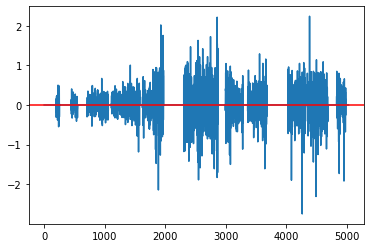

In [29]:
TD["Profit"].plot()
plt.axhline(y=0,color='red')

In [30]:
TD["Wealth"] = TD["Profit"].cumsum()

In [31]:
TD["Wealth"].tail()

5024    44.137503
5025    44.137503
5026    44.137503
5027    44.137503
5028    44.137503
Name: Wealth, dtype: float64

In [32]:
#volatility calculation
3948*55

217140